<a href="https://colab.research.google.com/github/muralikrishnan2022/MIC_ProductivityPrediction/blob/main/MIC_ProductivityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [ ]:
# Load datasets
train_dataset_path = r"/content/drive/MyDrive/train.csv"
test_dataset_path = r"/content/drive/MyDrive/test.csv"

df = pd.read_csv(train_dataset_path)
Test = pd.read_csv(test_dataset_path)

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
df = df.drop('date', axis=1)

In [ ]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [ ]:
df['department'] = df['department'].replace({'sweing': 0, 'finishing': 1, 'finishing ': 1})
df['department']

0       0
1       1
2       0
3       0
4       0
       ..
1192    1
1193    1
1194    1
1195    1
1196    1
Name: department, Length: 1197, dtype: int64

In [ ]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [ ]:
df['quarter'] = df['quarter'].astype(str).str.extract('(\d+)').astype(int)
df['quarter'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [ ]:
day_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday":5,
    "Sunday": 6
}
df['day'] = df['day'].replace(day_mapping)
df['day'].unique()

array([3, 5, 6, 0, 1, 2])

In [ ]:
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

## Path 1
### Delete null values

In [ ]:
df.shape ##Will remove alot of data

(1197, 14)

## Path 2
### Impute using mean, median or mode

In [ ]:
median_wip = df['wip'].median()
df['wip'] = df['wip'].fillna(median_wip)
df['wip']

0       1108.0
1       1039.0
2        968.0
3        968.0
4       1170.0
         ...  
1192    1039.0
1193    1039.0
1194    1039.0
1195    1039.0
1196    1039.0
Name: wip, Length: 1197, dtype: float64

In [ ]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,0,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,1,3,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1,0,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,0,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,0,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,1,2,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,2,1,2,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,2,1,2,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,2,1,2,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


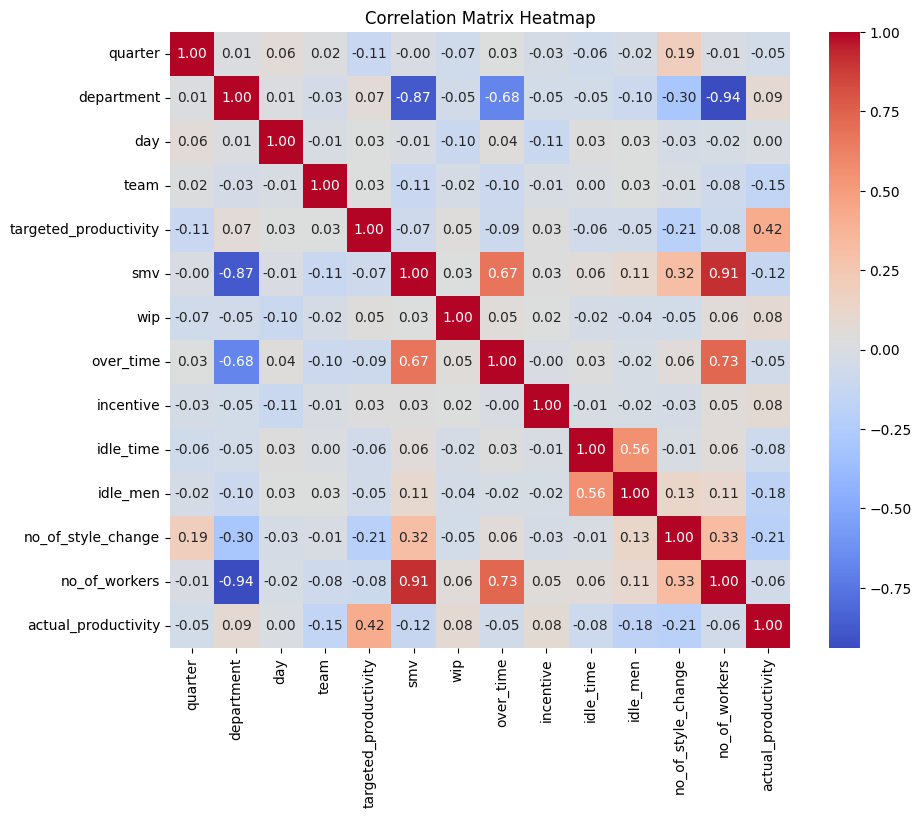

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
correlation_threshold = 0.14

In [ ]:
# Get columns with correlation higher than 0.15 with respect to the column 'actual'
high_corr_columns = correlation_matrix[abs(correlation_matrix['actual_productivity']) > correlation_threshold]['actual_productivity'].index.tolist()

# Remove 'actual' itself from the list if it's included
high_corr_columns.remove('actual_productivity')

print("Columns with correlation higher than 0.15 with respect to 'actual':")
print(high_corr_columns)

Columns with correlation higher than 0.15 with respect to 'actual':
['team', 'targeted_productivity', 'idle_men', 'no_of_style_change']


In [ ]:
df[high_corr_columns]

,team,targeted_productivity,idle_men,no_of_style_change
0,8,0.80,0,0
1,1,0.75,0,0
2,11,0.80,0,0
3,12,0.80,0,0
4,6,0.80,0,0
...,...,...,...,...
1192,10,0.75,0,0
1193,8,0.70,0,0
1194,7,0.65,0,0
1195,9,0.75,0,0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def display_regression_scores(test, pred):
    str_out = "TEST SCORES\n\n"

    # Calculate Mean Squared Error
    mse = mean_squared_error(test, pred)
    str_out += "Mean Squared Error (MSE): {:.4f}\n".format(mse)

    # Calculate R-squared (Coefficient of Determination)
    r_squared = r2_score(test, pred)
    str_out += "R-squared (R^2): {:.4f}\n".format(r_squared)

    return str_out

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named df and you have identified relevant features
# Features: X (independent variables), Target: y (dependent variable)

# Define features (X) and target variable (y)
X = df[high_corr_columns]  # Include the columns with higher correlation than 0.15
y = df['actual_productivity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.022492394345212642


In [ ]:
results = display_regression_scores(y_test, y_pred)
print(results)

TEST SCORES

Mean Squared Error (MSE): 0.0225
R-squared (R^2): 0.1529



In [ ]:
def accuracy_within_tolerance(test, pred, tolerance):
    # Calculate absolute errors
    errors = abs(test - pred)

    # Count number of predictions within tolerance
    within_tolerance = sum(errors <= tolerance)

    # Calculate accuracy
    accuracy = within_tolerance / len(test)

    return accuracy

In [ ]:
accuracy_within_tolerance(y_test, y_pred, 0.1)

0.6208333333333333

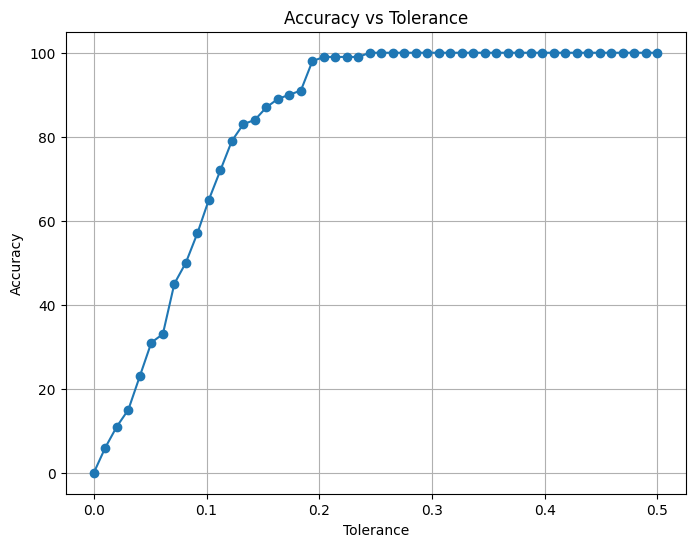

In [ ]:
np.random.seed(0)
test_values = np.random.rand(100)
pred_values = test_values + np.random.normal(0, 0.1, 100)  # Adding noise to create predicted values
tolerance_values = np.linspace(0, 0.5, 50)  # Tolerance values from 0 to 0.5

# Calculate accuracy for each tolerance level
accuracy_values = [accuracy_within_tolerance(test_values, pred_values, tol)*100 for tol in tolerance_values]

# Plot accuracy vs tolerance
plt.figure(figsize=(8, 6))
plt.plot(tolerance_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs Tolerance')
plt.xlabel('Tolerance')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Processing Test through dataprocessing pipeline

In [ ]:
Test['department'] = Test['department'].replace({'sweing': 0, 'finishing': 1, 'finishing ': 1})
Test['quarter'] = Test['quarter'].astype(str).str.extract('(\d+)').astype(int)
day_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday":5,
    "Sunday": 6
}
Test['day'] = Test['day'].replace(day_mapping)
X_testing = Test[high_corr_columns]
X_testing

,team,targeted_productivity,idle_men,no_of_style_change
0,6,0.76,15,0
1,9,0.63,0,0
2,7,0.70,0,0
3,12,0.79,0,0
4,8,0.62,25,0
...,...,...,...,...
395,4,0.80,0,0
396,7,0.74,0,0
397,10,0.80,0,0
398,2,0.70,0,0


In [ ]:
Y_submit = model.predict(X_testing)

In [ ]:
Y_submit

array([0.63439277, 0.65061374, 0.71711475, 0.7371791 , 0.42964296,
       0.75168521, 0.81335085, 0.6666913 , 0.6142116 , 0.78522755,
       0.74420992, 0.76310694, 0.55701756, 0.43259433, 0.75446433,
       0.76794231, 0.80470823, 0.42343188, 0.81115539, 0.76351106,
       0.70140097, 0.69320281, 0.62571402, 0.77054189, 0.6809325 ,
       0.76351106, 0.37860701, 0.5948074 , 0.67587724, 0.69763406,
       0.78903479, 0.51473264, 0.61747552, 0.75325666, 0.72029799,
       0.73337185, 0.60238575, 0.72454969, 0.78903479, 0.7008173 ,
       0.71004358, 0.78782712, 0.74465438, 0.36492599, 0.73601177,
       0.60520521, 0.56942708, 0.81335085, 0.51812846, 0.74420992,
       0.63973533, 0.65482511, 0.67488946, 0.75285254, 0.49535192,
       0.73637555, 0.54895861, 0.5602008 , 0.72736915, 0.82360525,
       0.69862185, 0.63874755, 0.46297691, 0.77013777, 0.69602227,
       0.66247994, 0.44226507, 0.74420992, 0.57653438, 0.68840778,
       0.73278819, 0.4023394 , 0.75007342, 0.7186862 , 0.55576

In [ ]:
submission_csv_path = "/content/submission.csv"
df.to_csv(submission_csv_path, index=False)

# Provide an option to the user to download the submission CSV file
download_option = input("Do you want to download the submission CSV file? (yes/no): ").lower()
if download_option == 'yes':
    from google.colab import files
    files.download(submission_csv_path)
else:
    print("CSV file not downloaded.")

Do you want to download the submission CSV file? (yes/no): yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission_df = pd.DataFrame({'ID': [i for i in range(400)],
                              'actual_productivity': Y_submit})

# Save result to CSV file

submission_df.to_csv('/content/submission.csv', index=False)
submission_df.head()

,ID,actual_productivity
0,0,0.634393
1,1,0.650614
2,2,0.717115
3,3,0.737179
4,4,0.429643
